<a href="https://colab.research.google.com/github/Sriishita/Portfolio/blob/main/Preprocessed_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import zipfile
import os

# Define path to your dataset zip file and extraction directory
zip_path = '/content/drive/MyDrive/plant_main.zip'
extract_path = '/content/Extract'

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verify extraction
print("Extracted Files:", os.listdir(extract_path))


Mounted at /content/drive
Extracted Files: ['plant_main', '__MACOSX']


In [ ]:
# Count images function
def count_images_in_directory(directory):
    total_images = 0
    for root, _, files in os.walk(directory):
        for filename in files:
            if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                total_images += 1
    return total_images

# Define path to extracted data
data_dir = '/content/Extract/plant_main'

# Count images
total_images = count_images_in_directory(data_dir)
print(f"Total images in '{data_dir}': {total_images}")


Total images in '/content/Extract/plant_main': 76416


In [ ]:
# Define paths for train, validation, and test sets
train_dir = os.path.join(data_dir, 'train')
valid_dir = os.path.join(data_dir, 'valid')
test_dir = os.path.join(data_dir, 'test')

# Verify folder structure
print("Train folders:", os.listdir(train_dir))
print("Validation folders:", os.listdir(valid_dir))
print("Test folders:", os.listdir(test_dir))


Train folders: ['Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', '.DS_Store', 'Soybean___healthy', 'Apple___Black_rot', 'Pepper,_bell___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Apple___Cedar_apple_rust', 'Tomato___Early_blight', 'Orange___Haunglongbing_(Citrus_greening)', 'Pepper,_bell___Bacterial_spot', 'Cherry_(including_sour)___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Strawberry___healthy', 'Potato___healthy', 'Raspberry___healthy', 'Tomato___Leaf_Mold', 'Peach___Bacterial_spot', 'Tomato___Septoria_leaf_spot', 'Tomato___Target_Spot', 'Potato___Late_blight', 'Apple___healthy', 'Tomato___Tomato_mosaic_virus', 'Grape___Esca_(Black_Measles)', 'Potato___Early_blight', 'Peach___healthy', 'Tomato___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Late_blight', 'Corn_(maize)___Common_rust_', 'Grape___healthy', 'Squash___Powdery_mildew', 'Corn_(maize)___healthy']
Validation folders: ['Tomato__

In [ ]:
import cv2
import numpy as np

def preprocess_images(input_dir, output_dir, image_size=(224, 224)):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for root, _, files in os.walk(input_dir):
        for filename in files:
            if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(root, filename)
                image = cv2.imread(img_path)

                if image is None:
                    continue

                # Step 1: Noise Reduction
                blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

                # Step 2: Color Normalization
                normalized_image = cv2.normalize(blurred_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

                # Step 3: Resizing
                resized_image = cv2.resize(normalized_image, image_size)

                # Normalization for Model Input
                normalized_image = resized_image / 255.0

                # Save processed image
                relative_path = os.path.relpath(root, input_dir)
                output_subdir = os.path.join(output_dir, relative_path)
                if not os.path.exists(output_subdir):
                    os.makedirs(output_subdir)

                output_path = os.path.join(output_subdir, filename)
                cv2.imwrite(output_path, (normalized_image * 255).astype(np.uint8))
                print(f"Processed and saved: {output_path}")


In [ ]:
# Define output paths for the processed images
train_output_dir = '/content/Processed_Plant/train'
valid_output_dir = '/content/Processed_Plant/valid'
test_output_dir = '/content/Processed_Plant/test'

# Preprocess images
preprocess_images(train_dir, train_output_dir)
preprocess_images(valid_dir, valid_output_dir)
preprocess_images(test_dir, test_output_dir)


Streaming output truncated to the last 5000 lines.
Processed and saved: /content/Processed_Plant/valid/Tomato___Tomato_mosaic_virus/73d4d7e9-6565-468f-83f4-ce0652c23577___PSU_CG 2316_180deg.JPG
Processed and saved: /content/Processed_Plant/valid/Tomato___Tomato_mosaic_virus/27ebc6ca-9094-46c1-9fa7-35432b9adb93___PSU_CG 2310_newPixel25.JPG
Processed and saved: /content/Processed_Plant/valid/Tomato___Tomato_mosaic_virus/9586aed6-53c5-4245-8994-a60ac12e422c___PSU_CG 2361_180deg.JPG
Processed and saved: /content/Processed_Plant/valid/Tomato___Tomato_mosaic_virus/6065503d-0803-4697-90f7-8c7db1ee28ab___PSU_CG 2227_90deg.JPG
Processed and saved: /content/Processed_Plant/valid/Tomato___Tomato_mosaic_virus/82a23930-4324-4d3e-b599-9861796f01db___PSU_CG 2366_180deg.JPG
Processed and saved: /content/Processed_Plant/valid/Tomato___Tomato_mosaic_virus/ebfce9c7-8727-4218-9e7b-cd4f2ff50177___PSU_CG 2112_90deg.JPG
Processed and saved: /content/Processed_Plant/valid/Tomato___Tomato_mosaic_virus/7d688270

Train Samples:


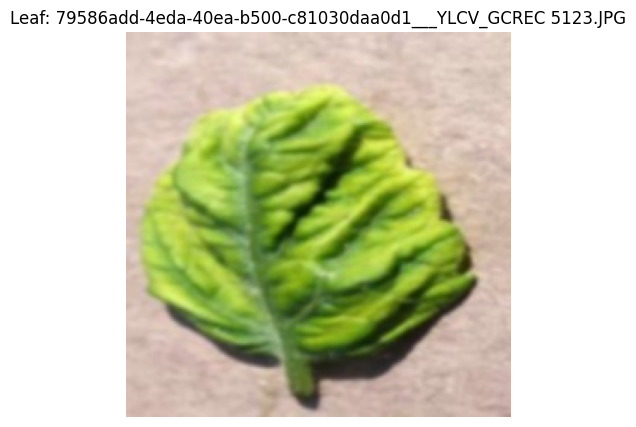

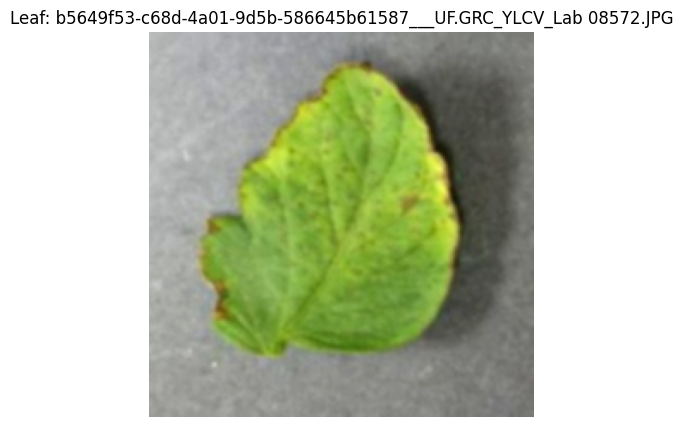

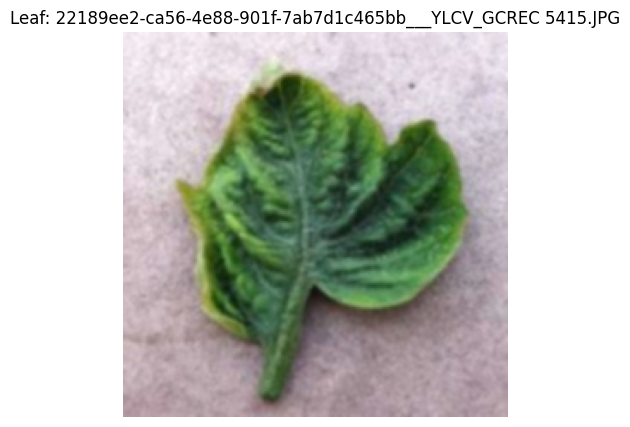

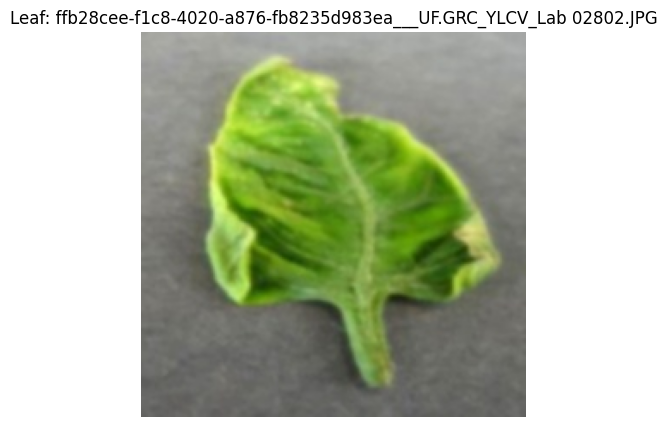

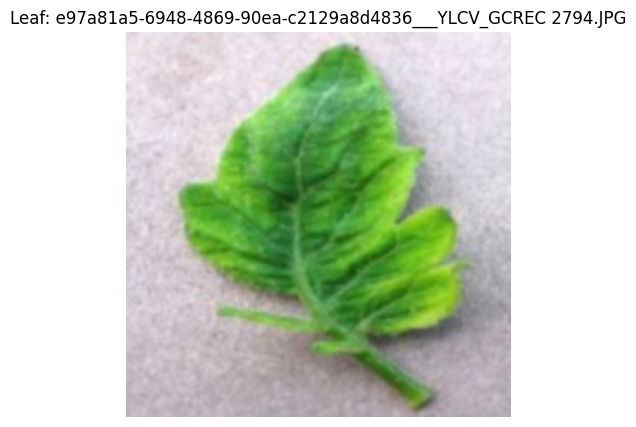

Validation Samples:


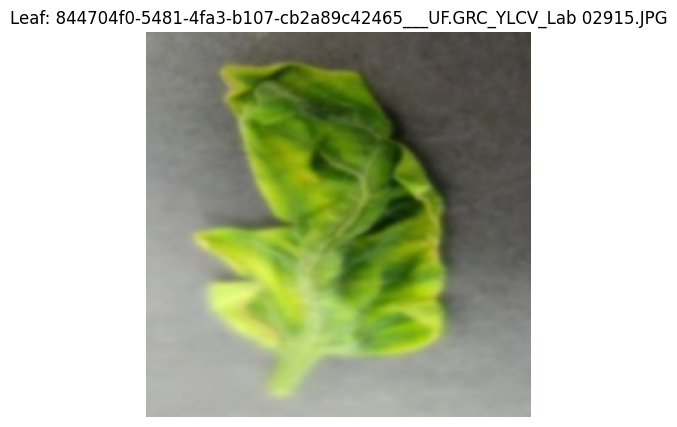

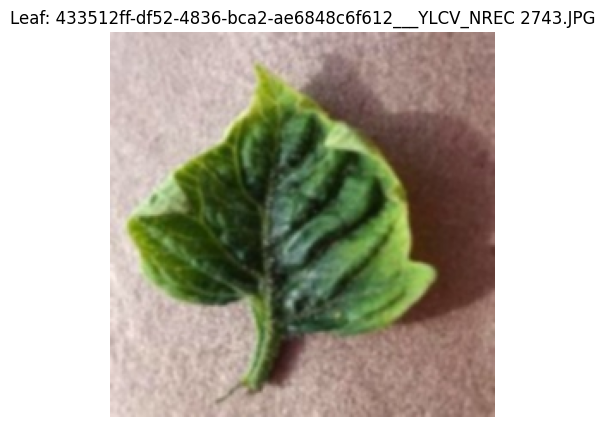

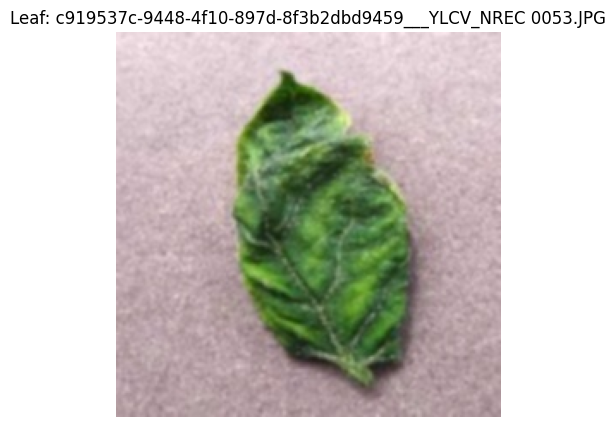

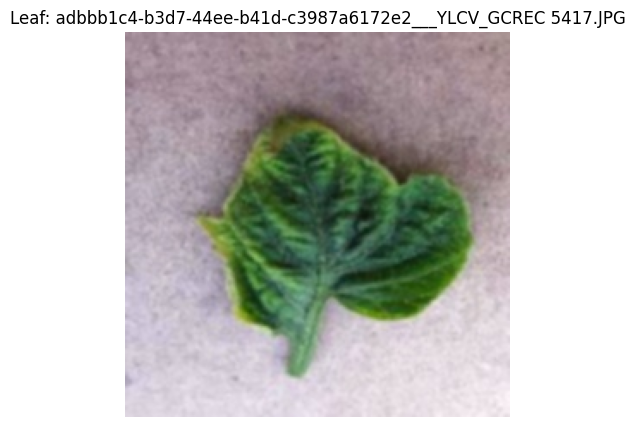

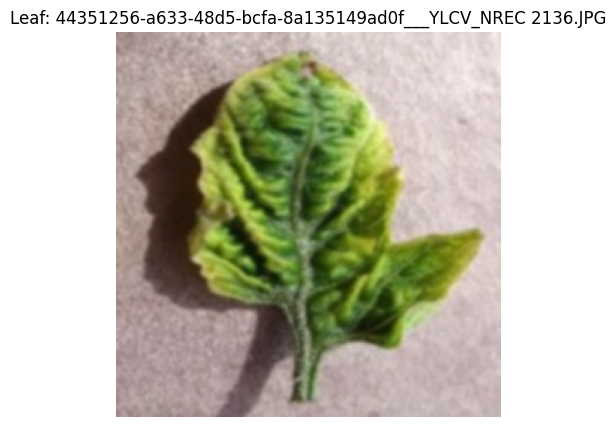

Test Samples:


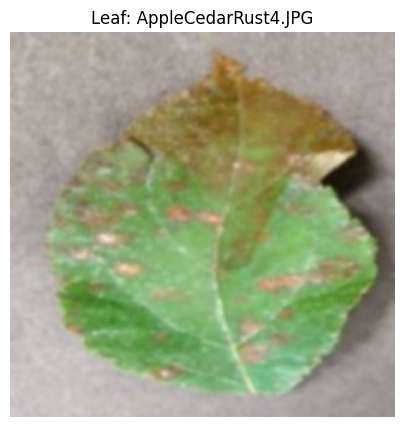

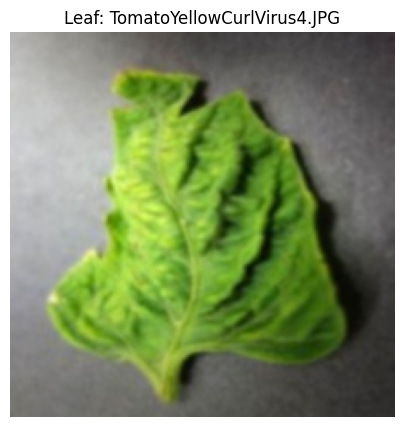

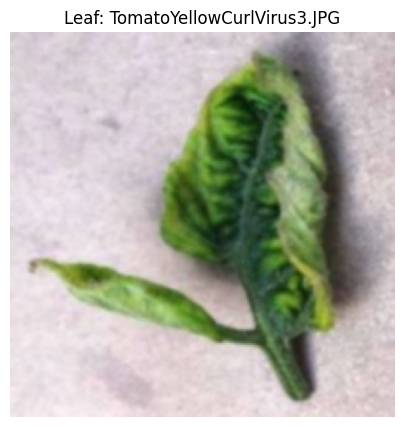

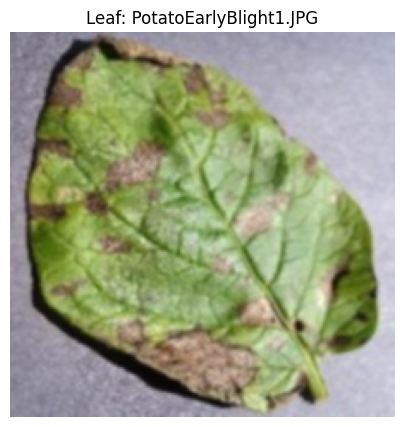

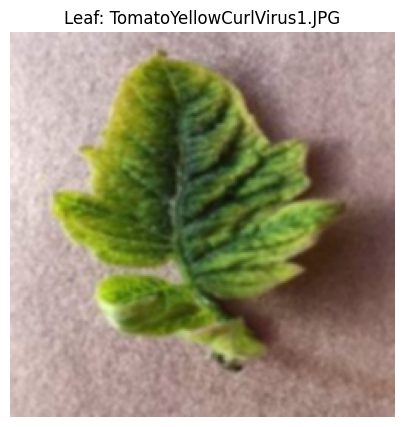

In [ ]:
import matplotlib.pyplot as plt
import os
import cv2

def show_sample_images(input_dir, num_samples=5):
    images_shown = 0
    for root, _, files in os.walk(input_dir):
        for filename in files:
            if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(root, filename)
                image = cv2.imread(img_path)
                image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                # Display the image with the filename
                plt.figure(figsize=(5, 5))
                plt.imshow(image_rgb)
                plt.title(f'Leaf: {filename}')
                plt.axis('off')
                plt.show()

                images_shown += 1
                if images_shown >= num_samples:
                    return

# Display samples from each directory with filenames
print("Train Samples:")
show_sample_images(train_output_dir)

print("Validation Samples:")
show_sample_images(valid_output_dir)

print("Test Samples:")
show_sample_images(test_output_dir)


In [ ]:
import shutil

def zip_directory(folder_path, zip_file_path):
    """Zip the folder itself, including its contents."""
    folder_parent = os.path.dirname(folder_path)
    folder_name = os.path.basename(folder_path)

    # Zip the folder while maintaining the directory structure
    shutil.make_archive(zip_file_path, 'zip', folder_parent, folder_name)

# Define the path for the processed images and the zip file
processed_data_dir = '/content/Processed_Plant'  # Make sure this matches the path to your processed folder
zip_file_path = '/content/Processed_Plant_Zip'

# Create the zip file
zip_directory(processed_data_dir, zip_file_path)

print(f"Successfully zipped '{processed_data_dir}' into '{zip_file_path}.zip'")


Successfully zipped '/content/Processed_Plant' into '/content/Processed_Plant_Zip.zip'


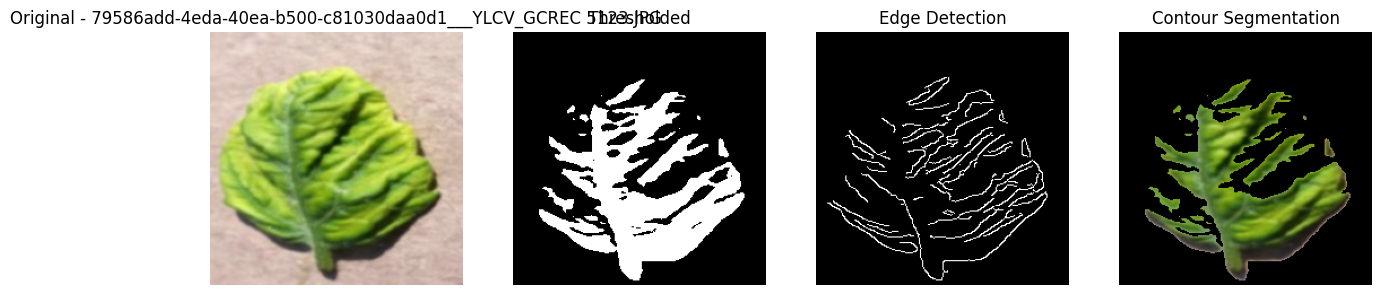

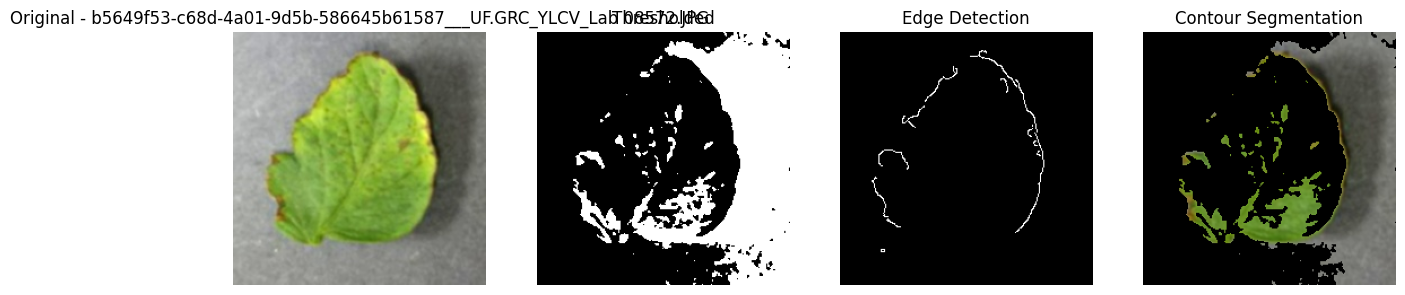

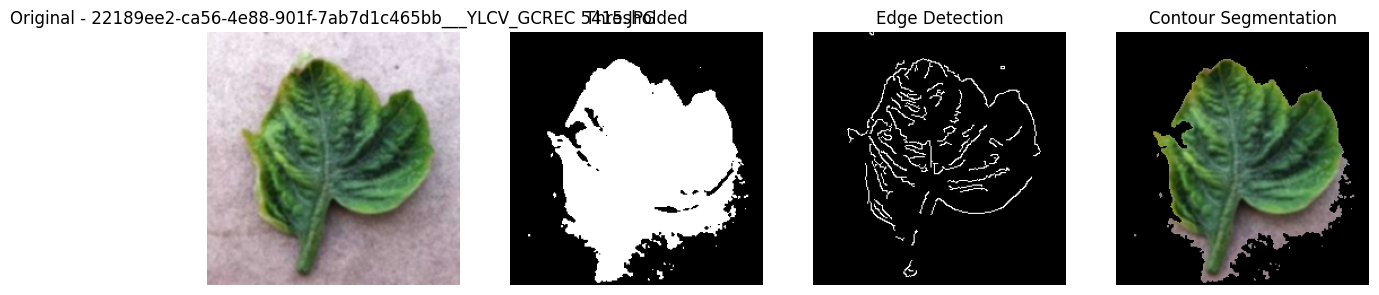

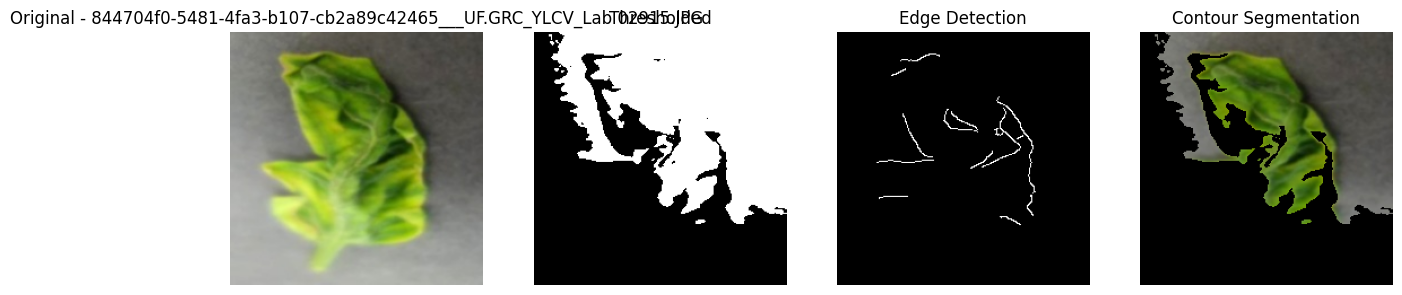

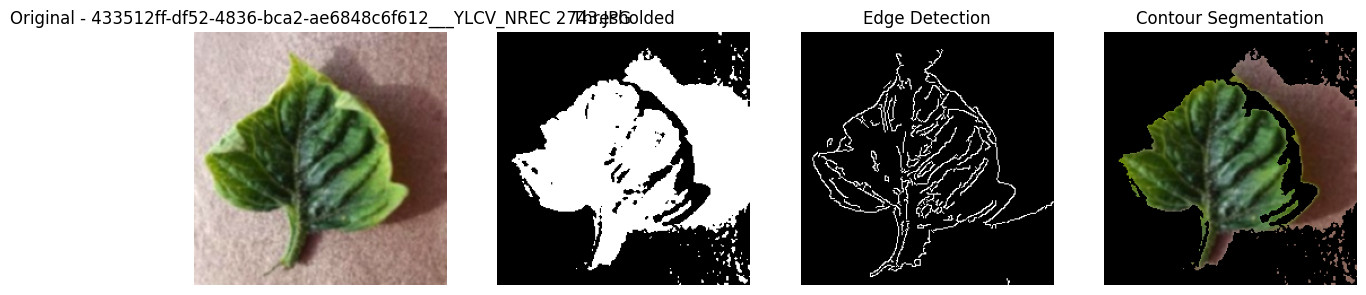

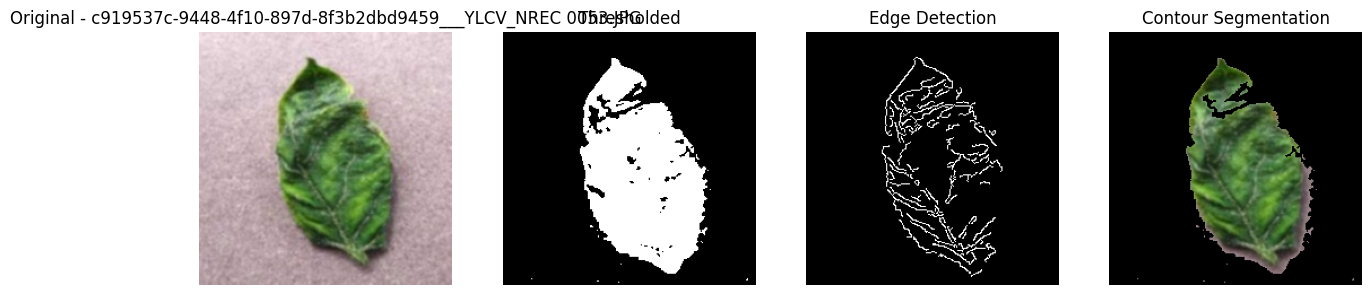

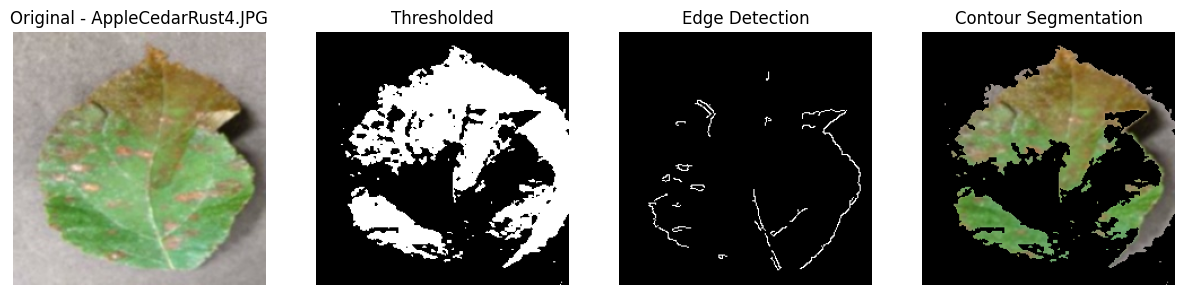

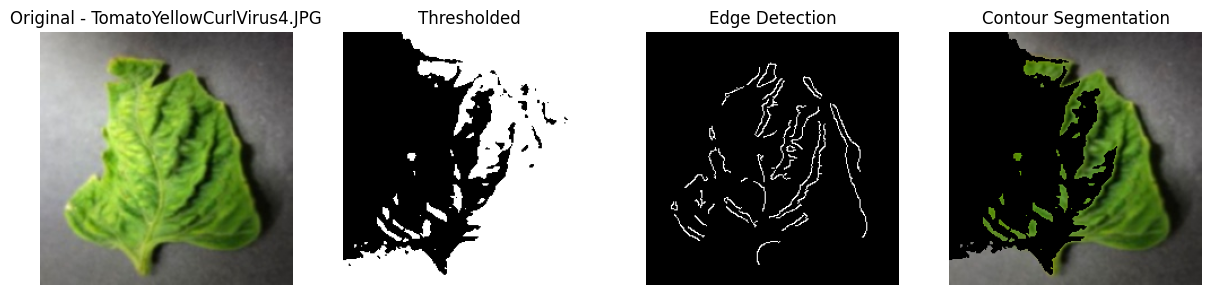

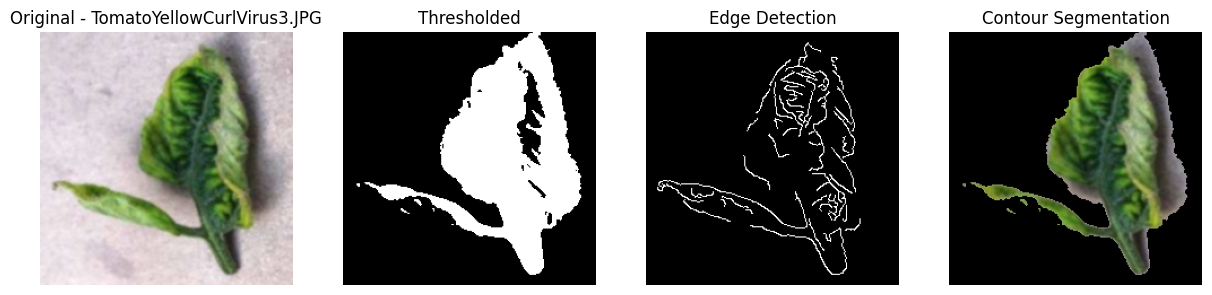

                                          mean_color  \
0  [10.99348294005102, 32.849888392857146, 25.102...   
1  [27.599509725765305, 37.32196667729592, 34.345...   
2  [29.909080038265305, 45.084602200255105, 33.42...   
3  [43.67233338647959, 65.38436702806122, 56.8200...   
4  [31.871910873724488, 65.10303730867346, 42.578...   

                                           std_color  \
0  [21.939534393924376, 57.897144557230085, 44.73...   
1  [42.58372023663315, 54.38736547694379, 49.3832...   
2  [40.28103235699261, 56.04997241176757, 44.7295...   
3  [46.71125563422301, 58.33391539352576, 50.9324...   
4  [45.998337077927125, 76.8659593283393, 54.6177...   

                                            lbp_hist  contour_area  \
0  [0.01498724489766049, 0.01803651147923237, 0.0...       12945.5   
1  [0.016800860969052915, 0.021544164540386955, 0...       16095.5   
2  [0.013671874999727522, 0.020009566326131826, 0...       20781.5   
3  [0.017358896683327508, 0.029555963009615036

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import feature

# Directory for preprocessed images
processed_data_dir = '/content/Processed_Plant'

# Function for threshold segmentation
def threshold_segmentation(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    return binary_thresh

# Function for edge detection
def edge_detection(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)
    return edges

# Function for contour-based segmentation
def contour_segmentation(image):
    binary_image = threshold_segmentation(image)
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    mask = np.zeros_like(binary_image)
    cv2.drawContours(mask, contours, -1, 255, thickness=cv2.FILLED)
    segmented_image = cv2.bitwise_and(image, image, mask=mask)
    return segmented_image

# Feature extraction function
def extract_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Color features (Mean and Std)
    mean_color = np.mean(image, axis=(0, 1))
    std_color = np.std(image, axis=(0, 1))

    # Texture features (LBP)
    lbp = feature.local_binary_pattern(gray, P=8, R=1, method="uniform")
    lbp_hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 10), range=(0, 9))
    lbp_hist = lbp_hist.astype("float")
    lbp_hist /= (lbp_hist.sum() + 1e-6)  # Normalize histogram

    # Shape feature (Contour Area)
    _, binary_image = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour_area = sum(cv2.contourArea(cnt) for cnt in contours)

    return {
        "mean_color": mean_color,
        "std_color": std_color,
        "lbp_hist": lbp_hist,
        "contour_area": contour_area
    }

# Process and extract features from all images
feature_data = []
sample_images = []

def process_directory(input_dir, num_samples=3):
    images_shown = 0
    for root, _, files in os.walk(input_dir):
        for filename in files:
            if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(root, filename)
                image = cv2.imread(img_path)

                # Apply segmentation methods
                threshold_img = threshold_segmentation(image)
                edge_img = edge_detection(image)
                segmented_img = contour_segmentation(image)

                # Extract features
                features = extract_features(segmented_img)
                features['filename'] = filename
                feature_data.append(features)

                # Store a few samples for visualization
                if images_shown < num_samples:
                    sample_images.append((filename, image, threshold_img, edge_img, segmented_img))
                    images_shown += 1

# Process each dataset directory
process_directory(os.path.join(processed_data_dir, 'train'))
process_directory(os.path.join(processed_data_dir, 'valid'))
process_directory(os.path.join(processed_data_dir, 'test'))

# Convert feature data to DataFrame
feature_df = pd.DataFrame(feature_data)

# Display sample images for verification
def display_sample_images(sample_images):
    for filename, original, threshold, edge, segmented in sample_images:
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 4, 1)
        plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
        plt.title(f'Original - {filename}')
        plt.axis('off')

        plt.subplot(1, 4, 2)
        plt.imshow(threshold, cmap='gray')
        plt.title('Thresholded')
        plt.axis('off')

        plt.subplot(1, 4, 3)
        plt.imshow(edge, cmap='gray')
        plt.title('Edge Detection')
        plt.axis('off')

        plt.subplot(1, 4, 4)
        plt.imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB))
        plt.title('Contour Segmentation')
        plt.axis('off')

        plt.show()

# Display a few processed sample images
display_sample_images(sample_images)

# Display the extracted feature data
print(feature_df.head())


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage import feature

# Directory of segmented images (replace with the path of segmented images)
segmented_data_dir = '/content/Processed_Plant'

# Initialize a list to store the feature data for each image
feature_data = []

# Function to extract color features
def color_features(image):
    # Calculate mean and standard deviation for each color channel
    mean_color = np.mean(image, axis=(0, 1))  # RGB channels
    std_color = np.std(image, axis=(0, 1))
    return mean_color, std_color

# Function to extract texture features using Local Binary Pattern (LBP)
def texture_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lbp = feature.local_binary_pattern(gray, P=8, R=1, method="uniform")
    lbp_hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 10), range=(0, 9))
    lbp_hist = lbp_hist.astype("float")
    lbp_hist /= (lbp_hist.sum() + 1e-6)  # Normalize histogram
    return lbp_hist

# Function to extract shape features by calculating contour area
def shape_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_image = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour_area = sum(cv2.contourArea(cnt) for cnt in contours)
    return contour_area

# Function to extract features from all segmented images in the directory
def extract_features_from_directory(input_dir):
    for root, _, files in os.walk(input_dir):
        for filename in files:
            if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(root, filename)
                image = cv2.imread(img_path)

                # Check if the image was loaded properly
                if image is None:
                    print(f"Error loading image: {img_path}")
                    continue

                try:
                    # Extract color, texture, and shape features
                    mean_color, std_color = color_features(image)
                    lbp_hist = texture_features(image)
                    contour_area = shape_features(image)

                    # Combine features into a single dictionary for the image
                    feature_vector = {
                        "filename": filename,
                        "mean_color_R": mean_color[0],
                        "mean_color_G": mean_color[1],
                        "mean_color_B": mean_color[2],
                        "std_color_R": std_color[0],
                        "std_color_G": std_color[1],
                        "std_color_B": std_color[2],
                        "contour_area": contour_area
                    }
                    feature_vector.update({f"lbp_bin_{i}": lbp_hist[i] for i in range(len(lbp_hist))})
                    feature_data.append(feature_vector)

                except Exception as e:
                    print(f"Error processing image {filename}: {e}")

# Extract features from segmented images
extract_features_from_directory(segmented_data_dir)

# Convert feature data to a DataFrame for model training
feature_df = pd.DataFrame(feature_data)

# Display the extracted features for a sample of images
print(feature_df.head())


                     filename  mean_color_R  mean_color_G  mean_color_B  \
0         AppleCedarRust4.JPG    126.097915    159.347437    151.177575   
1  TomatoYellowCurlVirus4.JPG     85.265585    130.656170    113.432099   
2  TomatoYellowCurlVirus3.JPG    161.847078    173.941625    173.805345   
3      PotatoEarlyBlight1.JPG    124.671815    155.246791    149.332629   
4  TomatoYellowCurlVirus1.JPG    107.535395    135.568718    144.524593   

   std_color_R  std_color_G  std_color_B  contour_area  lbp_bin_0  lbp_bin_1  \
0    41.911770    28.458710    30.860776       34741.0   0.017180   0.039441   
1    53.592254    52.523932    47.589711       21339.5   0.011500   0.032047   
2    71.959104    52.650802    66.648155       33978.0   0.016223   0.036890   
3    55.081266    39.526131    38.283693       42294.0   0.020946   0.040577   
4    62.232396    46.071134    54.121015       28673.5   0.023677   0.046138   

   lbp_bin_2  lbp_bin_3  lbp_bin_4  lbp_bin_5  lbp_bin_6  lbp_bin_7 